# Importing the necessary libraries

In [1]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

tf.random.set_seed(4)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Description of the Batik Dataset
**Give the descriptions here.**

In [10]:
# Creating the Pathlib PATH objects
train_path = Path("/content/drive/MyDrive/heritage/dataset/TRAIN")
test_path = Path("/content/drive/MyDrive/heritage/dataset/TEST")

In [11]:
# Collecting all the Paths Inside "Normal" and "Pneumonia" folders of the above paths
train_image_paths = train_path.glob("*/*")
test_image_paths = test_path.glob("*/*")

# Output is a Generator object
print(train_image_paths)

<generator object Path.glob at 0x7fe54e79ff40>


In [12]:
# Convert Generator Object to List of elements
train_image_paths = list(train_image_paths)
test_image_paths = list(test_image_paths)

# Now the outputs are "PosixPath" objects
print(train_image_paths[:3])

[PosixPath('/content/drive/MyDrive/heritage/dataset/TRAIN/Batik Bali/Salinan 2.jpg'), PosixPath('/content/drive/MyDrive/heritage/dataset/TRAIN/Batik Bali/Salinan 68 (3).jpg'), PosixPath('/content/drive/MyDrive/heritage/dataset/TRAIN/Batik Bali/Salinan 1 (3).jpg')]


In [13]:
# Convert Posix paths to normal strings
train_image_paths = list(map(lambda x : str(x) , train_image_paths))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))

print(train_image_paths[:3])

['/content/drive/MyDrive/heritage/dataset/TRAIN/Batik Bali/Salinan 2.jpg', '/content/drive/MyDrive/heritage/dataset/TRAIN/Batik Bali/Salinan 68 (3).jpg', '/content/drive/MyDrive/heritage/dataset/TRAIN/Batik Bali/Salinan 1 (3).jpg']


In [14]:
# Collect Length for Training and Validation Datasets
train_dataset_length = len(train_image_paths)
test_dataset_length = len(test_image_paths)

print("Number of train image: ", train_dataset_length)
print("Number of testing image: ", test_dataset_length)

Number of train image:  2370
Number of testing image:  610


# Data Visualization & Preprocessing

In [15]:
#CHANGE THE LABEL HERE

# Every Image has Label in its path , so lets slice it
LABELS = {'Batik Bali' : 0 , 'Batik Dayak' : 1, 'Batik Geblek Renteng' : 2, 'Batik Ikat Celup' : 3, 'Batik Kawung' : 4,
          'Batik Lasem' : 5, 'Batik Megamendung' : 6,'Batik Parang' : 7,'Batik Tambal' : 8}
INV_LABELS = {0 : 'Batik Bali' , 1 : 'Batik Dayak', 2 : 'Batik Geblek Renteng', 3 : 'Batik Ikat Celup', 4 : 'Batik Kawung',
              5 : 'Batik Lasem', 6 : 'Batik Megamendung', 7 : 'Batik Parang', 8 : 'Batik Tambal'}


def get_label(path : str) -> int:
    return LABELS[path.split("/")[-2]]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
# val_labels = list(map(lambda x : get_label(x) , val_image_paths))
test_image_labels = list(map(lambda x : get_label(x) , test_image_paths))

print(train_image_labels[:3])

[0, 0, 0]


<Axes: ylabel='count'>

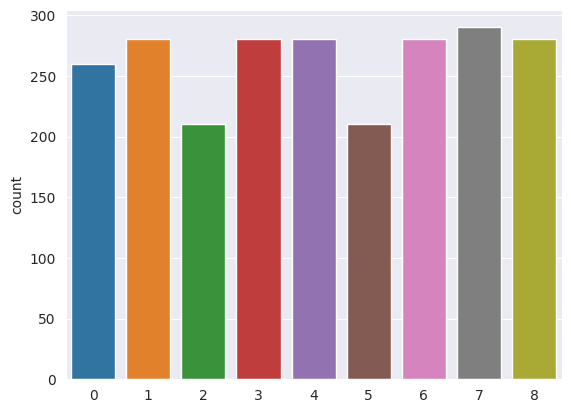

In [16]:
l = []
for i in train_image_labels:
  l.append(str(i))
sns.set_style('darkgrid')
sns.countplot(x=l)

**The data seems imbalanced. To increase the number of training examples, we will use data augmentation**

In [17]:
# Now we have all training, validation image paths and their respective labels

BATCH_SIZE = 32

# Function used for Transformation
def load_and_transform(images, train = True):
    image = tf.io.read_file(images)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = image / 255
    image = tf.image.resize(image, [224 , 224], method="nearest")
    return image

In [18]:
len(train_image_paths)

2370

In [19]:
train_images_paths = []
train_images_labels = []

for i, val in enumerate(train_image_paths):
  try:
    train_images_paths.append(load_and_transform(val))
    train_images_labels.append(train_image_labels[i])
  except:
    print(val)

# train_image_paths_all = [load_and_transform(i) for i in train_image_paths]
train_images_paths = np.asarray(train_images_paths)
train_images_labels = np.asarray(train_images_labels)

In [20]:
print(train_images_paths.shape)
print(train_images_labels.shape)

(2370, 224, 224, 3)
(2370,)


In [21]:
test_images_paths = []
test_images_labels = []

for i, val in enumerate(test_image_paths):
  try:
    test_images_paths.append(load_and_transform(val))
    test_images_labels.append(test_image_labels[i])
  except:
    print(val)

# test_image = [load_and_transform(i) for i in test_image_paths]
test_images_paths = np.asarray(test_images_paths)
test_images_labels = np.asarray(test_images_labels)
print(test_images_paths.shape)
print(test_images_labels.shape)

(610, 224, 224, 3)
(610,)


In [22]:
train_images_labels_cat = tf.keras.utils.to_categorical(train_images_labels)
test_images_labels_cat = tf.keras.utils.to_categorical(test_images_labels)


train_images_labels_cat[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
#Split test data into val data and test data

from sklearn.model_selection import train_test_split

test_images, val_images, test_labels, val_labels = train_test_split(test_images_paths , test_images_labels_cat, test_size=0.4, random_state=42)

In [24]:
train_images = train_images_paths
train_labels = train_images_labels_cat

In [25]:
print(train_images[1].shape)
print(train_labels[1].shape)

(224, 224, 3)
(9,)


**Previewing the images of train and validation**

Batik Bali


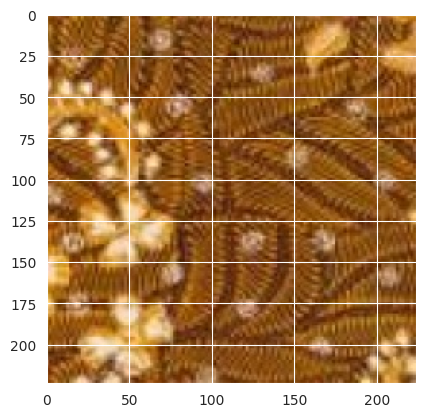

In [26]:
# View a sample Train Image
print(INV_LABELS[train_images_labels[0]])
plt.imshow(train_images_paths[0].reshape(224 , 224 , 3))

Batik Bali


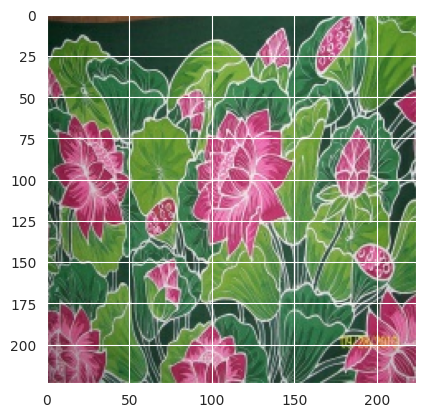

In [27]:
# View a sample test Image
print(INV_LABELS[test_images_labels[0]])
plt.imshow(test_images_paths[0].reshape(224 , 224 , 3))

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

In [28]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,
        rotation_range=30,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        )


datagen.fit(train_images)

In [29]:
print(train_images.shape)
print(train_labels.shape)

(2370, 224, 224, 3)
(2370, 9)


In [30]:
print(test_images.shape)
print(test_labels.shape)

(366, 224, 224, 3)
(366, 9)


# InceptionV3 Model



In [31]:
# Building EfficentNetB3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3

backbone = InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False
)

model2 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    #CHANGE NUMBER OF LABEL HERE FROM 15 TO YOUR TOTAL OF UNIQUE LABELS
    tf.keras.layers.Dense(9, activation='sigmoid')
])

model2.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 22,066,217
Trainable params: 22,031,785
Non

In [36]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [37]:
# Defining our callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights_inception.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [38]:
# Train the model
history = model2.fit(
    datagen.flow(train_images,train_labels, batch_size = 32),
    steps_per_epoch=train_dataset_length//BATCH_SIZE,
    epochs=25,
    callbacks=[checkpoint , early_stop, learning_rate_reduction],
    validation_data = datagen.flow(val_images, val_labels)
)

Epoch 1/25
74/74 [==============================] - ETA: 0s - loss: 0.6710 - accuracy: 0.7938 - precision: 0.2841 - recall: 0.9679
Epoch 1: val_loss improved from inf to 984.74084, saving model to best_weights_inception.h5
74/74 [==============================] - 83s 560ms/step - loss: 0.6710 - accuracy: 0.7938 - precision: 0.2841 - recall: 0.9679 - val_loss: 984.7408 - val_accuracy: 0.2910 - val_precision: 0.1954 - val_recall: 0.5246 - lr: 0.0010
Epoch 2/25
74/74 [==============================] - ETA: 0s - loss: 0.4884 - accuracy: 0.8550 - precision: 0.3004 - recall: 0.9837
Epoch 2: val_loss improved from 984.74084 to 1.69389, saving model to best_weights_inception.h5
74/74 [==============================] - 41s 547ms/step - loss: 0.4884 - accuracy: 0.8550 - precision: 0.3004 - recall: 0.9837 - val_loss: 1.6939 - val_accuracy: 0.5984 - val_precision: 0.2800 - val_recall: 0.9180 - lr: 0.0010
Epoch 3/25
74/74 [==============================] - ETA: 0s - loss: 0.4048 - accuracy: 0.8764 

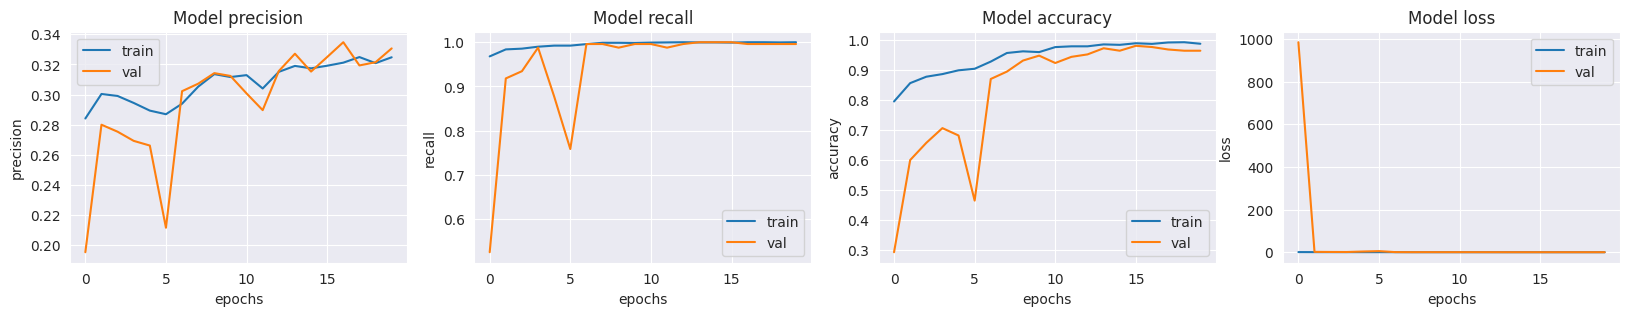

In [39]:
# Interpreting the Metrics
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [40]:
import pandas as pd
metrics = ['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall']
models = [history]
model_name = ['InceptionV3']
best_model = []

for i in models:
  m = np.argmax(i.history['val_accuracy'])
  for j in metrics:
    best_model.append(i.history[j][m])

df = pd.DataFrame((np.array(best_model)).reshape(1,8), columns=metrics, index=model_name)

In [41]:
df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
InceptionV3,0.045927,0.988024,0.319126,0.999145,0.068141,0.979508,0.3249,1.0


# Saving the Model

In [46]:
# Saving & load the Model to test

# Save the whole model (weigths + architecture)
model2.save("model.h5")
model2.save("/content/drive/MyDrive/heritage/Code" + '/model.h5')

# Testing the Model

In [48]:
# Load the whole model + architecture
try:
    loaded_model = tf.keras.models.load_model("model.h5")
except:
    loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/heritage/Code"+'/model.h5')

In [49]:
# Evaluating the loaded model
loss, acc, prec, rec = loaded_model.evaluate(test_images, test_labels)

print(" Testing Loss " , loss)
print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

12/12 [==============================] - 4s 189ms/step - loss: 0.1080 - accuracy: 0.9754 - precision: 0.3271 - recall: 0.9973
 Testing Loss  0.10798557102680206
 Testing Acc :  0.9754098653793335
 Testing Precision  0.3270609378814697
 Testing Recall  0.9972677826881409


In [50]:
y_pred_cat = loaded_model.predict(test_images)
y_pred = np.argmax(y_pred_cat, axis=1)

y_test = np.argmax(test_labels, axis=1)

12/12 [==============================] - 3s 75ms/step


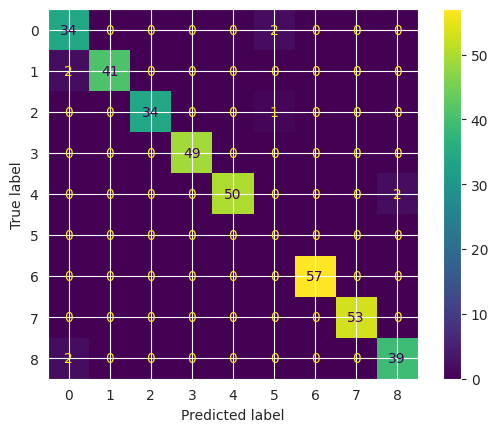

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [52]:
from sklearn.metrics import classification_report

#CHANGE THE TARGET NAMES ACCORDING TO YOUR LABEL
target_names = ['Batik Bali' , 'Batik Dayak', 'Batik Geblek Renteng', 'Batik Ikat Celup', 'Batik Kawung',
              'Batik Lasem', 'Batik Megamendung', 'Batik Parang', 'Batik Tambal']
print(classification_report(y_test, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

          Batik Bali       0.89      0.94      0.92        36
         Batik Dayak       1.00      0.95      0.98        43
Batik Geblek Renteng       1.00      0.97      0.99        35
    Batik Ikat Celup       1.00      1.00      1.00        49
        Batik Kawung       1.00      0.96      0.98        52
         Batik Lasem       0.00      0.00      0.00         0
   Batik Megamendung       1.00      1.00      1.00        57
        Batik Parang       1.00      1.00      1.00        53
        Batik Tambal       0.95      0.95      0.95        41

            accuracy                           0.98       366
           macro avg       0.87      0.86      0.87       366
        weighted avg       0.98      0.98      0.98       366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from PIL import Image, ImageOps
from tensorflow import keras

In [54]:
# loaded_model.predict(test_images)
prediction = loaded_model.predict(test_images)
classID = np.argmax(prediction)
classID

12/12 [==============================] - 1s 73ms/step


755

In [57]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open('/content/drive/MyDrive/heritage/dataset/TEST/Batik Lasem/Salinan 71.jpg')
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array
prediction = loaded_model.predict(data)
classID = np.argmax(prediction)
# classID

1/1 [==============================] - 1s 1s/step


In [58]:
# Load the model from the h5 file
# model = keras.models.load_model('model-restnet.h5')

# Load the image data that you want to predict
image = keras.preprocessing.image.load_img('/content/drive/MyDrive/heritage/dataset/TEST/Batik Parang/Salinan 75.jpg', target_size=(224, 224))
image_array = keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

# Normalize the image data
image_array = keras.applications.mobilenet_v2.preprocess_input(image_array)

# Make a prediction
prediction = loaded_model.predict(image_array)

# Display the predicted class
predicted_class = np.argmax(prediction)
print('Predicted class:', predicted_class)

1/1 [==============================] - 0s 114ms/step
Predicted class: 2


1/1 [==============================] - 0s 34ms/step
/content/drive/MyDrive/heritage/dataset/TEST/Batik Parang/Salinan 89.jpg
Predicted batik:  Batik Parang


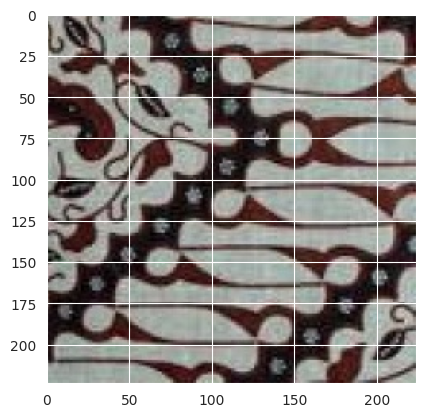

In [59]:
image_path = "/content/drive/MyDrive/heritage/dataset/TEST/Batik Parang/Salinan 89.jpg"

# Function used for Transformation
def load_and_transform(images, train = True):
    image = tf.io.read_file(images)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = image / 255
    image = tf.image.resize(image, [224 , 224], method="nearest")
    image = tf.expand_dims(image , 0)
    return image

image_test = load_and_transform(image_path)
label_cat = loaded_model.predict(image_test)
label = np.argmax(label_cat, axis=1)

# View a sample test Image
print(image_path)
plt.imshow(np.asarray(image_test).reshape(224,224,3))
print("Predicted batik: ", INV_LABELS[label[0]])